In [1]:
"""
This notebook plots DeepSHAP profile and quantity for a super core promoter (Fig. 6A).
"""

'\nThis notebook plots DeepSHAP profile and quantity for a super core promoter (Fig. 6A).\n'

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import plot_weights

In [2]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set SCRATCH to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "example_tracks_and_deepshap.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")

wget https://zenodo.org/records/10597358/files/example_tracks_and_deepshap.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/example_tracks_and_deepshap.tar.gz -C /Users/adamhe/github/scratch


In [4]:
# Load SHAP scores
profile_shap = np.load(
    os.path.join(SCRATCH, "example_tracks_and_deepshap/folds_chen_core_promoter_profile.npz")
)
mean_profile = np.array([profile_shap[fold] for fold in profile_shap.files]).mean(axis=0) * 500

quantity_shap = np.load(
    os.path.join(SCRATCH, "example_tracks_and_deepshap/folds_chen_core_promoter_quantity.npz")
)
mean_quantity = np.array([quantity_shap[fold] for fold in quantity_shap.files]).mean(axis=0) * 500

In [5]:
# Crop to only core promoter sequences

with open("chen_core_promoter_sequences.json") as f:
    core_promoters = json.load(f)

left_padding = [int(np.floor((1000 - len(seq)) / 2)) for seq in core_promoters.values()]
right_padding = [int(np.ceil((1000 - len(seq)) / 2)) for seq in core_promoters.values()]

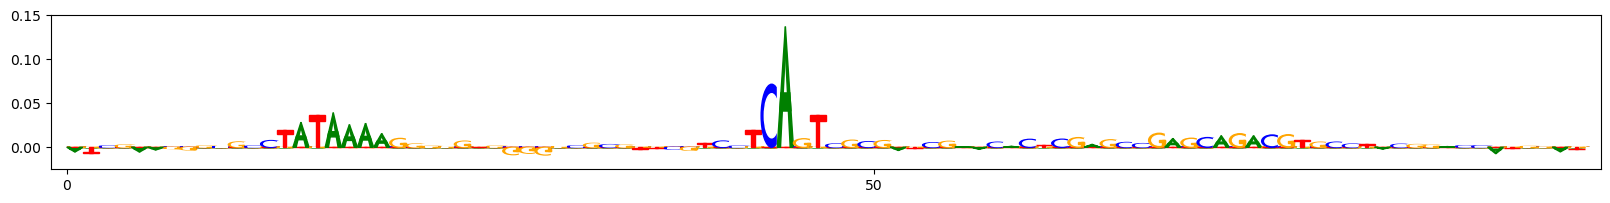

In [6]:
plot_weights(
    mean_profile[0, :, left_padding[0]:1000 - right_padding[0]],
    subticks_frequency=50, neg_height=-5e-5 * 500, pos_height=3e-4 * 500
)
plt.savefig("img/ensemble_deepshap_profile_scp.pdf")


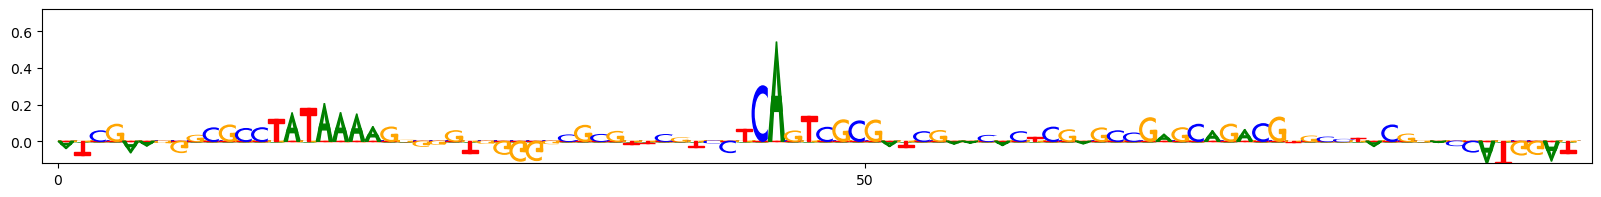

In [14]:
plot_weights(
    mean_quantity[0, :, left_padding[0]:1000 - right_padding[0]],
    subticks_frequency=50, neg_height=-0.12, pos_height=0.72
)
plt.savefig("img/ensemble_deepshap_quantity_scp.pdf")

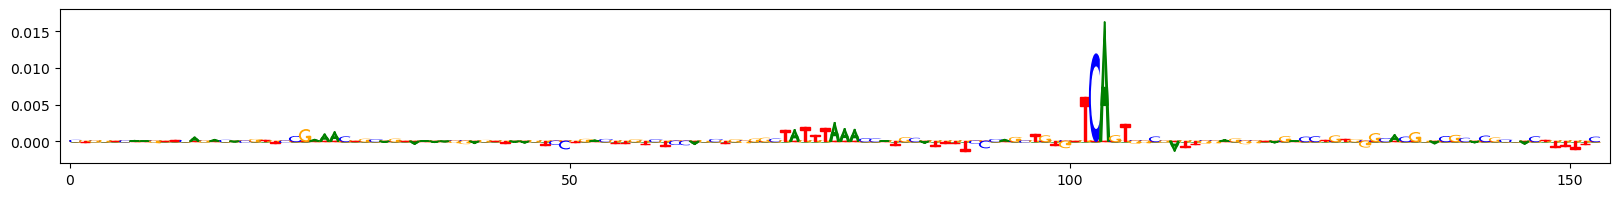

In [7]:
plot_weights(
    mean_profile[1, :, left_padding[1]:1000 - right_padding[1]],
    subticks_frequency=50, neg_height=-6e-6 * 500, pos_height=3.6e-5 * 500
)
plt.savefig("img/ensemble_deepshap_profile_hdm2.pdf")

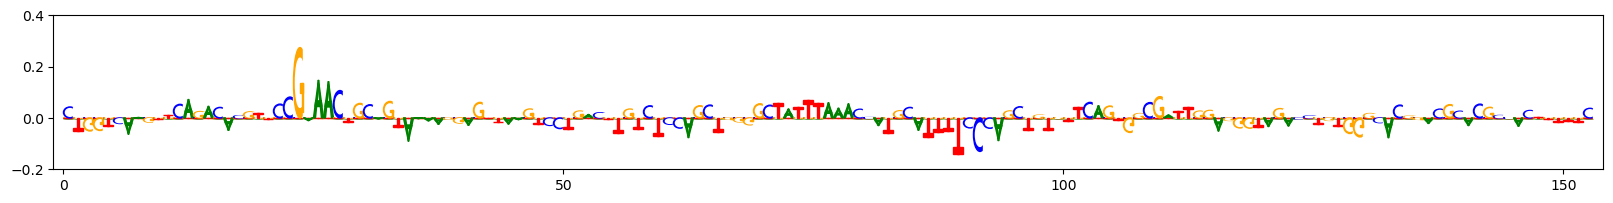

In [16]:
plot_weights(
    mean_quantity[1, :, left_padding[1]:1000 - right_padding[1]],
    subticks_frequency=50, neg_height=-0.2, pos_height=0.4
)
plt.savefig("img/ensemble_deepshap_quantity_hdm2.pdf")